### Assessing the Readiness of HEI in Malaysia to Accept Generation Alpha

---

# Data Transformation

- Creating new features from existing features
- Trimming Columns
- Handling ordinal and nominal categorical features
- Feature Selection

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
%%time
new_df = pd.read_hdf('../data/interim/Info_UserData_Info_Content.h5', key='user')

Wall time: 432 ms


In [43]:
new_df.head()

,problem_number,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,points,...,user_city_ntct,user_city_ntpc,user_city_phc,user_city_ptc,user_city_tc,user_city_tn,user_city_tp,user_city_ttct,user_city_ty,user_city_ylc
0,12,7.0,89.800000,1.600000,0.500000,3.0,0.0,1.0,1,9533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4,0.0,74.250000,1.500000,3.250000,4.0,0.0,0.0,0,8027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7,1.0,24.571429,1.428571,3.142857,6.0,0.0,0.0,0,8027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,8,3.0,37.750000,1.125000,1.875000,5.0,0.0,0.0,0,8027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,26,15.0,14.923077,1.500000,0.423077,11.0,0.0,1.0,1,73838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
new_df.columns

Index(['problem_number', 'is_correct', 'total_sec_taken', 'total_attempt_cnt',
       'used_hint_cnt', 'is_hint_used', 'is_downgrade', 'is_upgrade', 'level',
       'points', 'badges_cnt', 'user_grade', 'has_teacher_cnt',
       'is_self_coach', 'has_student_cnt', 'belongs_to_class_cnt',
       'has_class_cnt', 'date_count', 'difficulty', 'learning_stage',
       'user_city_chc', 'user_city_cy', 'user_city_hc', 'user_city_hlc',
       'user_city_ilc', 'user_city_kh', 'user_city_kl', 'user_city_km',
       'user_city_lj', 'user_city_ml', 'user_city_ntct', 'user_city_ntpc',
       'user_city_phc', 'user_city_ptc', 'user_city_tc', 'user_city_tn',
       'user_city_tp', 'user_city_ttct', 'user_city_ty', 'user_city_ylc'],
      dtype='object')

## Splitting Train Set and Test Set

In [45]:
from sklearn.model_selection import train_test_split

X = new_df.drop('level', axis=1)
y = new_df['level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
df = pd.DataFrame(X).copy()
df['target'] = y
#sns.countplot('target', data=df)

In [48]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X, y = rus.fit_sample(X, y)

#plot_2d_space(X_rus, y_rus, 'Random under-sampling')

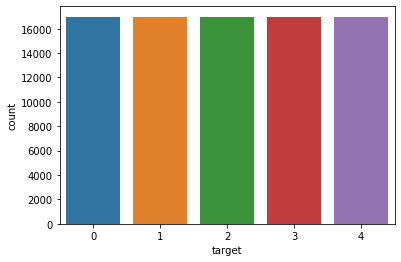

In [49]:
df = pd.DataFrame(X).copy()
df['target'] = y
sns.countplot('target', data=df)

### Correlation with the Target

In [50]:
X.corr()

,problem_number,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,points,badges_cnt,...,user_city_ntct,user_city_ntpc,user_city_phc,user_city_ptc,user_city_tc,user_city_tn,user_city_tp,user_city_ttct,user_city_ty,user_city_ylc
problem_number,1.000000,0.907703,-0.029275,0.076382,0.114895,0.711472,0.260976,0.348967,0.107711,0.164697,...,0.008841,-0.006570,0.000059,0.018437,-0.015261,0.010872,-0.014866,0.035629,-0.011648,-0.004567
is_correct,0.907703,1.000000,-0.084008,-0.045004,-0.093532,0.396189,0.167045,0.440354,0.110486,0.122812,...,0.000545,0.009310,-0.002552,-0.000025,-0.015334,0.009994,-0.001300,0.015621,-0.010632,-0.002044
total_sec_taken,-0.029275,-0.084008,1.000000,0.160561,0.234686,0.079803,0.024039,-0.131848,-0.007892,0.012124,...,0.014674,-0.002293,0.007753,0.000478,0.030668,0.009850,0.001406,0.001859,-0.015565,-0.011058
total_attempt_cnt,0.076382,-0.045004,0.160561,1.000000,0.512248,0.258631,0.066424,-0.144720,-0.000738,0.059840,...,0.009075,-0.021862,-0.010117,0.021793,0.020007,0.001308,-0.045148,0.021705,0.018397,0.004586
used_hint_cnt,0.114895,-0.093532,0.234686,0.512248,1.000000,0.447706,0.105794,-0.271705,-0.042119,0.050022,...,0.019088,-0.031129,-0.006830,0.028270,0.026365,0.010457,-0.055886,0.023855,0.037705,-0.009925
is_hint_used,0.711472,0.396189,0.079803,0.258631,0.447706,1.000000,0.314197,0.068363,0.054566,0.170257,...,0.016619,-0.025650,0.004782,0.025905,-0.006959,0.005959,-0.035935,0.062616,-0.007818,-0.008525
is_downgrade,0.260976,0.167045,0.024039,0.066424,0.105794,0.314197,1.000000,0.233420,0.065624,0.082912,...,0.006309,-0.003678,0.000098,0.007074,-0.001643,0.003972,-0.012988,0.047765,-0.009348,0.001981
is_upgrade,0.348967,0.440354,-0.131848,-0.144720,-0.271705,0.068363,0.233420,1.000000,0.291032,0.190869,...,-0.006256,0.047229,-0.007667,-0.027076,-0.029850,0.000228,0.039372,0.003834,-0.040678,0.029251
points,0.107711,0.110486,-0.007892,-0.000738,-0.042119,0.054566,0.065624,0.291032,1.000000,0.779232,...,-0.041504,0.037750,-0.023585,-0.045374,-0.042120,0.001392,0.005817,0.033456,-0.040114,-0.019854
badges_cnt,0.164697,0.122812,0.012124,0.059840,0.050022,0.170257,0.082912,0.190869,0.779232,1.000000,...,-0.021166,-0.036690,-0.022255,-0.030316,-0.026297,0.015286,-0.018708,0.066700,-0.017290,-0.055141


In [53]:
X.columns

Index(['problem_number', 'is_correct', 'total_sec_taken', 'total_attempt_cnt',
       'used_hint_cnt', 'is_hint_used', 'is_downgrade', 'is_upgrade', 'points',
       'badges_cnt', 'user_grade', 'has_teacher_cnt', 'is_self_coach',
       'has_student_cnt', 'belongs_to_class_cnt', 'has_class_cnt',
       'date_count', 'difficulty', 'learning_stage', 'user_city_chc',
       'user_city_cy', 'user_city_hc', 'user_city_hlc', 'user_city_ilc',
       'user_city_kh', 'user_city_kl', 'user_city_km', 'user_city_lj',
       'user_city_ml', 'user_city_ntct', 'user_city_ntpc', 'user_city_phc',
       'user_city_ptc', 'user_city_tc', 'user_city_tn', 'user_city_tp',
       'user_city_ttct', 'user_city_ty', 'user_city_ylc'],
      dtype='object')

## Wraper Methods

In [52]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['problem_number', 'is_correct', 'total_sec_taken', 'total_attempt_cnt', 'used_hint_cnt', 'is_hint_used', 'is_upgrade', 'points', 'badges_cnt', 'is_self_coach']
[1.28938150e-01 1.43346968e-01 3.54801742e-02 3.24746855e-02
 3.82376127e-02 2.64551564e-02 4.83945971e-03 3.21611246e-01
 3.86160281e-02 3.19322422e-02 1.64268073e-02 1.06558595e-02
 8.95361264e-02 2.52004339e-03 1.19044550e-02 4.00545525e-03
 1.32463934e-02 7.20342641e-03 4.33784666e-03 1.81301980e-03
 1.80594483e-03 2.28812785e-03 1.12116143e-03 9.73257941e-04
 2.11099553e-03 1.02982425e-03 1.04811715e-03 2.19204195e-05
 1.48068398e-03 1.59425204e-03 3.91083470e-03 1.51283582e-04
 1.63112815e-03 3.61688700e-03 2.35302050e-03 4.07013248e-03
 1.25960593e-03 4.04958145e-03 1.90208544e-03]


In [55]:
X = X[['problem_number', 'is_correct', 'total_sec_taken', 'total_attempt_cnt', 'used_hint_cnt', 'is_hint_used', 'is_upgrade', 'points', 'badges_cnt', 'is_self_coach']]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [57]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Feature Selection

### Amount of Variation

In [58]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.5)
X_train = sel.fit_transform(X_train)
X_test = sel.transform(X_test)

In [59]:
X_train.shape

(67936, 10)

### PCA

In [60]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [61]:
X_train.shape

(67936, 7)

## Data Modeling

In [62]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [63]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [64]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3310   21    6    4    0]
 [  58 3086  136   51    8]
 [  14  290 2698  388   78]
 [  25  160  687 2110  426]
 [   3   48  324  825 2228]]


0.7908619877531795

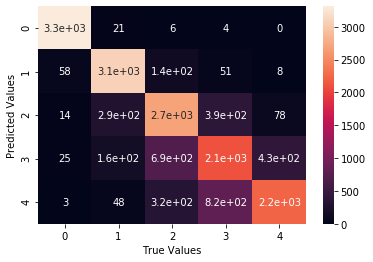

In [65]:
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
ax.set(xlabel='True Values', ylabel='Predicted Values')
plt.show()

In [66]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.03 %
Standard Deviation: 0.46 %


#### KNN

In [116]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [117]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [118]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3222  108    9    1    1]
 [ 112 3068  142   15    2]
 [   6  208 2876  361   17]
 [   2   28  581 2391  406]
 [   0    6  104  614 2704]]


0.8396726330664155

SVM

In [119]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [120]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [121]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3341    0    0    0    0]
 [   0 3335    4    0    0]
 [   0    9 3329  127    3]
 [   0    2  385 2924   97]
 [   0    0   10  680 2738]]


0.9224564295807819

# XGboost

In [86]:
# Training XGBoost on the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3257   77    3    2    2]
 [  38 3163  129    7    2]
 [   2  102 3091  264    9]
 [   1    5  202 3024  176]
 [   0    0    9  228 3191]]


0.9259302873292511